# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
#from config import api_key
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [8]:
print (weather_api_key)

3828483840e7d3f41de4bd10585da72f


## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [10]:
print(cities)

['atuona', 'uzhur', 'irbit', 'thompson', 'bambous virieux', 'longyearbyen', 'port macquarie', 'illoqqortoormiut', 'busselton', 'punta arenas', 'qaanaaq', 'sula', 'kaitangata', 'vaini', 'sao filipe', 'ushuaia', 'baracoa', 'baiao', 'avarua', 'balabac', 'jamestown', 'beringovskiy', 'chagda', 'saint-philippe', 'puro', 'mataura', 'loubomo', 'san cristobal', 'augustow', 'kahului', 'albany', 'yellowknife', 'marcona', 'tuktoyaktuk', 'torbay', 'honiara', 'kapaa', 'hun', 'mahebourg', 'ribeira grande', 'arraial do cabo', 'provideniya', 'nagato', 'nizhneyansk', 'hobart', 'kanniyakumari', 'kalakamati', 'iquique', 'wahiawa', 'bilibino', 'longlac', 'floro', 'teguldet', 'port pirie', 'belushya guba', 'bethel', 'butaritari', 'ekuvukeni', 'codrington', 'carutapera', 'bredasdorp', 'ahipara', 'swiecie', 'puerto ayora', 'lishu', 'hasaki', 'hervey bay', 'cap malheureux', 'kodiak', 'castro', 'east london', 'rikitea', 'barentsburg', 'tadine', 'lasa', 'victoria', 'deputatskiy', 'ust-nera', 'immokalee', 'waipaw

In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
api_format = "json"
units = "metric"

# Build partial query URL
#query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [14]:
print (url)

http://api.openweathermap.org/data/2.5/weather?


In [15]:
print (url+'angkat')

http://api.openweathermap.org/data/2.5/weather?angkat


In [16]:
print (url+'tiznit')

http://api.openweathermap.org/data/2.5/weather?tiznit


In [17]:
print (url+'georgetown')

http://api.openweathermap.org/data/2.5/weather?georgetown


In [18]:
cities = ['angkat', 'illoqqortoormiut', 'tiznit', 'arraial do cabo', 'rio gallegos', 'petropavlovsk-kamchatskiy', 'yellowknife', 'atuona', 'qaanaaq', 'magdagachi', 'vaini', 'varkkallai', 'ribeira grande', 'guerrero negro', 'salisbury', 'nikolskoye', 'hobart', 'georgetown', 'lebu', 'aras', 'hilo', 'kipini', 'jalu', 'storm lake', 'labuan']
# set up lists to hold reponse info
lat = []
temp = []
city_with_data = []




In [19]:
print (cities[0])
print (cities [-1])

angkat
labuan


In [20]:
#try:
    #print(jffjj)
#except:
    #print("the line is error")

In [21]:
lat.append("Chennaiu")
print(lat)

['Chennaiu']


In [22]:
lat.append("US")
print(lat)

['Chennaiu', 'US']


In [23]:
response = requests.get(url + "city").json()
#response['main']['pressure']
#response ['wind']['deg']

#response['clouds']
#response['clouds']['all']
response


{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [24]:
# Loop through the list of cities and perform a request for data on each
lat= []
temp = []
hum = []
cloud = []
wind = []
lon = []
temp_main = []
temp_max = []

city_with_data = []
for city in cities:
    try:
        response = requests.get(url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        city_with_data.append(response['name'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lon.append(response['coord']['lon'])
        temp_main.append(response['main'].get('temp_main', None))
        temp_max.append(response['main'].get('temp_max', None))
       
    except Exception as e:
        print(f"The information {city} is missing")
        print(e)


The information angkat is missing
'coord'
The information illoqqortoormiut is missing
'coord'
The information tiznit is missing
'coord'
The information arraial do cabo is missing
'coord'
The information rio gallegos is missing
'coord'
The information petropavlovsk-kamchatskiy is missing
'coord'
The information yellowknife is missing
'coord'
The information atuona is missing
'coord'
The information qaanaaq is missing
'coord'
The information magdagachi is missing
'coord'
The information vaini is missing
'coord'
The information varkkallai is missing
'coord'
The information ribeira grande is missing
'coord'
The information guerrero negro is missing
'coord'
The information salisbury is missing
'coord'
The information nikolskoye is missing
'coord'
The information hobart is missing
'coord'
The information georgetown is missing
'coord'
The information lebu is missing
'coord'
The information aras is missing
'coord'
The information hilo is missing
'coord'
The information kipini is missing
'coord

In [25]:
print(city_with_data)

[]


In [26]:
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: []
The temperature information received is: []


In [27]:
# create a data frame from cities, lat, and temp
weather_dict = {
                "city": city_with_data,
                "lat": lat,
                "temp": temp,
                "humidity":  hum,
                "clouds":    cloud,
                "speed": wind,
                "lon": lon,
                "temp_main": temp_main,
                "temp_max": temp_max
}

#import numpy.ma.mrecords as mrecords
weather_data = pd.DataFrame(weather_dict)
weather_data
#print(weather_dict)

,city,lat,temp,humidity,clouds,speed,lon,temp_main,temp_max


In [28]:
#Convert Raw Data to DataFrame
#Export the city data into a .csv.
#Display the DataFrame

In [29]:
#Convert Raw Data to DataFrame
# importing the module 
#import pandas as pd 
  
# saving the DataFrame as a CSV file 
weather_data.to_csv('weather_data.csv', index = True) 
print(weather_data.to_csv)


<bound method NDFrame.to_csv of Empty DataFrame
Columns: [city, lat, temp, humidity, clouds, speed, lon, temp_main, temp_max]
Index: []>


In [30]:
#Inspect the data and remove the cities where the humidity > 100%.
#Skip this step if there are no cities that have humidity > 100%.

In [31]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

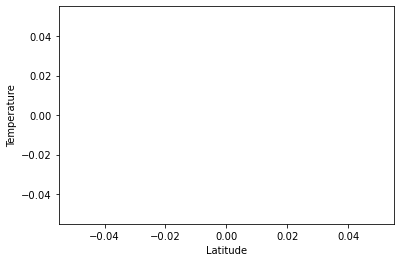

<Figure size 432x288 with 0 Axes>

In [32]:
 # Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

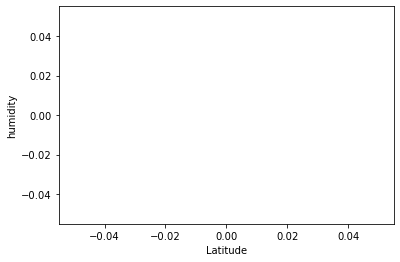

<Figure size 432x288 with 0 Axes>

In [33]:
 # Create a Scatter Plot for humidity (%) vs. Latitude
x_values = weather_data['lat']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')


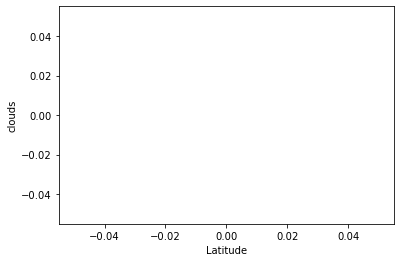

<Figure size 432x288 with 0 Axes>

In [34]:
#Cloudiness (%) vs. Latitude
 # Create a Scatter Plot for Cloudiness (%) vs. Latitude
x_values = weather_data['lat']
y_values = weather_data['clouds']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('clouds')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

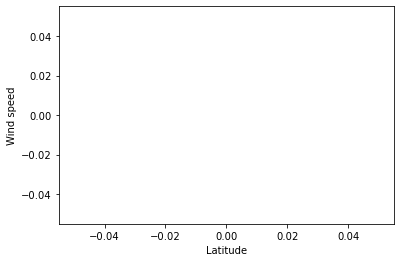

<Figure size 432x288 with 0 Axes>

In [36]:
 # Create a Scatter Plot for Wind speed vs. Latitude
x_values = weather_data['lat']
y_values = weather_data['speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

In [37]:
#weather_data["lat_sign"] = np.sign(weather_data.lat)
#print(weather_data).lat_sign

In [38]:
# create a data frame from cities, lat, and temp
North_dict = {
                "city": city_with_data,
                "lat": lat,
                "temp": temp,
                "humidity":  hum,
                "clouds":    cloud,
                "speed": wind,
                "lon": lon,
                "temp_max": temp_max
}
North_dict = pd.DataFrame(North_dict)
North_dict

,city,lat,temp,humidity,clouds,speed,lon,temp_max


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [39]:
#Cities: Tiznit Province, Petropavlovsk-Kamchatskiy. Yellowknife, Qaanaaq, Magdagachi, Varkala, Ribeira Grande, Guerrero Negro, Salisbury’ Nikolskoye, George Town, Aras, Hilo, Jalu, Storm Lake, Labuan
#Lat: 29.5833, 53.0452, 62.456, 77.484, 53.45, 8.7341, 38.5167, 27.9769, 51.0693, 59.7035, 5.4112, 42.5617, 19.7297, 29.0331, 42.6411, 5.2767
#Humidity: 67, 80, 69, 73, ,80, 62, 65, 42, 100, 65, 58, 93, 69, 90, 93, 74
##Clouds: 0, 75, 75, 68, 32, 20, 99, 98, 90, 90, 20, 90, 75, 0, 20, 20
#Speed: 0.2, 2, 1.72, 2.78, 3.15, 2.55, 11.79, 1.76, 2.06, 7, 3.6, 1.03, 3.09, 3.75, 6.17, 1.03
#temp_max: 10.96, -2, -27, -16.35, -20.63, 31, 13.79, 17.87, 6.11, -17.78, 31, 5, 24, 9.97, 5.56, 28


In [40]:
import pandas as pd
North_data = { 'cities': ['Tiznit Province', 'Petropavlovsk_Kamchatskiy', 'Yellowknife', 'Qaanaaq', 'Magdagachi', 'Varkala', 'Ribeira Grande', 'Guerrero Negro', 'Salisbury', 'Nikolskoye', 'George Town', 'Aras', 'Hilo', 'Jalu', 'Storm Lake', 'Labuan'],
        'lat': [29.5833, 53.0452, 62.4560, 77.4840, 53.4500, 8.7341, 38.5167, 27.9769, 51.0693, 59.7035, 5.4112, 42.5617, 19.7297, 29.0331, 42.6411, 5.2767],
        'temp_max': [10.96, -2, -27, -16.35, -20.63, 31, 13.79, 17.87, 6.11, -17.78, 31, 5, 24, 9.97, 5.56, 28],
        'humidity':[67, 80, 69, 73, 80, 62, 65, 42, 100, 65, 58, 93, 69, 90, 93, 74],
        'clouds': [0, 75, 75, 68, 32, 20, 99, 98, 90, 90, 20, 90, 75, 0, 20, 20],
        'speed': [0.2, 2, 1.72, 2.78, 3.15, 2.55, 11.79, 1.76, 2.06, 7, 3.6, 1.03, 3.09, 3.75, 6.17, 1.03]
        }

North_data = pd.DataFrame(North_data, columns = ["cities", "lat","temp_max", "humidity", "clouds", "speed"])
print (North_data)

                       cities      lat  temp_max  humidity  clouds  speed
0             Tiznit Province  29.5833     10.96        67       0   0.20
1   Petropavlovsk_Kamchatskiy  53.0452     -2.00        80      75   2.00
2                 Yellowknife  62.4560    -27.00        69      75   1.72
3                     Qaanaaq  77.4840    -16.35        73      68   2.78
4                  Magdagachi  53.4500    -20.63        80      32   3.15
5                     Varkala   8.7341     31.00        62      20   2.55
6              Ribeira Grande  38.5167     13.79        65      99  11.79
7              Guerrero Negro  27.9769     17.87        42      98   1.76
8                   Salisbury  51.0693      6.11       100      90   2.06
9                  Nikolskoye  59.7035    -17.78        65      90   7.00
10                George Town   5.4112     31.00        58      20   3.60
11                       Aras  42.5617      5.00        93      90   1.03
12                       Hilo  19.7297

In [42]:
 # Identify incomplete rows
North_data.dtypes

cities       object
lat         float64
temp_max    float64
humidity      int64
clouds        int64
speed       float64
dtype: object

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

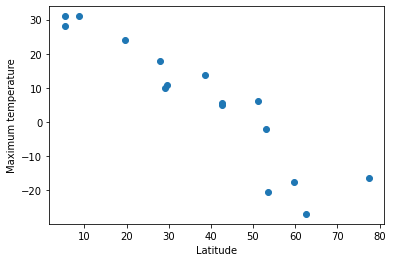

<Figure size 432x288 with 0 Axes>

In [43]:
# Plot out maximum temperature versus latitude of country
x_values = North_data['lat']
y_values = North_data['temp_max']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum temperature')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

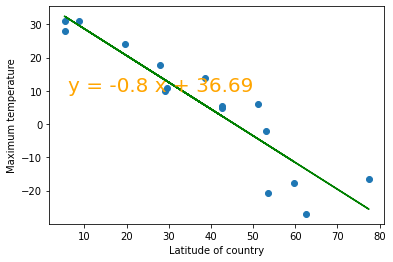

<Figure size 432x288 with 0 Axes>

In [44]:
# Add the linear regression equation and line to plot
x_values = North_data['lat']
y_values = North_data['temp_max']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

plt.annotate(line_eq,(6,10), fontsize=20, color="orange")

plt.xlabel('Latitude of country')
plt.ylabel('Maximum temperature')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

In [45]:
#City: Arraial do Cabo, Río Gallegos, Atuona, Vaini, Hobart, Lebu, Kipini
#Lat: -23, -51.6, -9.8, -21.2, -42.9, -37.6, -2.53
#temp_max: 24, 8, 26.19, 29, 18.89, 13.07, 24.15
#humidity: 94, 61, 79, 70, 44, 79, 91
#clouds: 75, 20, 53, 20, 75, 0, 100
#wind_speed: 1.03, 10.29, 6.77, 3.6, 3.6, 8.03, 2.75


In [46]:
# DataFrame of Cities in Southern hemisphere using a dictionary of lists
import pandas as pd
south_data = {'cities': ['Arraial do Cabo', 'Río Gallegos', 'Atuona', 'Vaini', 'Hobart', 'Lebu', 'Kipini'],
    'Lat': [-23, -51.6, -9.8, -21.2, -42.9, -37.6, -2.53],
    'temp_max': [24, 8, 26.19, 29, 18.89, 13.07, 24.15],
    'humidity':[94, 61, 79, 70, 44, 79, 91],
    'clouds': [75, 20, 53, 20, 75, 0, 100],
    'wind_speed': [1.03, 10.29, 6.77, 3.6, 3.6, 8.03, 2.75]
    } 

south_data = pd.DataFrame(south_data, columns = ['cities', 'Lat','temp_max', 'humidity', 'clouds', 'wind_speed'])
print (south_data)

            cities    Lat  temp_max  humidity  clouds  wind_speed
0  Arraial do Cabo -23.00     24.00        94      75        1.03
1     Río Gallegos -51.60      8.00        61      20       10.29
2           Atuona  -9.80     26.19        79      53        6.77
3            Vaini -21.20     29.00        70      20        3.60
4           Hobart -42.90     18.89        44      75        3.60
5             Lebu -37.60     13.07        79       0        8.03
6           Kipini  -2.53     24.15        91     100        2.75


In [47]:
south_data.dtypes

cities         object
Lat           float64
temp_max      float64
humidity        int64
clouds          int64
wind_speed    float64
dtype: object

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

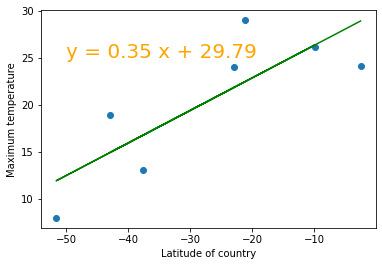

<Figure size 432x288 with 0 Axes>

In [48]:
# Add the linear regression equation and line to plot
x_values = south_data['Lat']
y_values = south_data['temp_max']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

plt.annotate(line_eq,(-50,25), fontsize=20, color="orange")

plt.xlabel('Latitude of country')
plt.ylabel('Maximum temperature')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

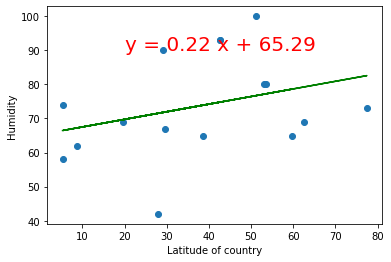

<Figure size 432x288 with 0 Axes>

In [49]:
# linear regression equation and line plot of North Hem humidity vs latitude
x_values = North_data['lat']
y_values = North_data['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

plt.annotate(line_eq,(20,90), fontsize=20, color="red")

plt.xlabel('Latitude of country')
plt.ylabel('Humidity')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

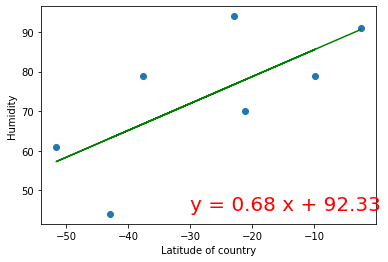

<Figure size 432x288 with 0 Axes>

In [50]:
# linear regression equation and line plot of North Hem humidity vs latitude
x_values = south_data['Lat']
y_values = south_data['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

plt.annotate(line_eq,(-30, 45), fontsize=20, color="red")

plt.xlabel('Latitude of country')
plt.ylabel('Humidity')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

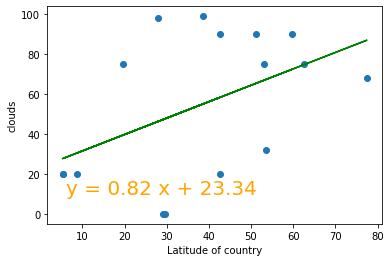

<Figure size 432x288 with 0 Axes>

In [51]:
# linear regression equation and line plot of North Hem humidity vs latitude
x_values = North_data['lat']
y_values = North_data['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

plt.annotate(line_eq,(6,10), fontsize=20, color="orange")

plt.xlabel('Latitude of country')
plt.ylabel('clouds')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

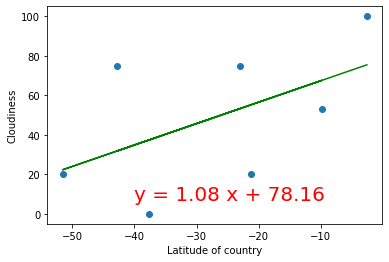

<Figure size 432x288 with 0 Axes>

In [52]:
# linear regression equation and line plot of North Hem cloudiness vs latitude
x_values = south_data['Lat']
y_values = south_data['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

plt.annotate(line_eq,(-40,7), fontsize=20, color="red")

plt.xlabel('Latitude of country')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

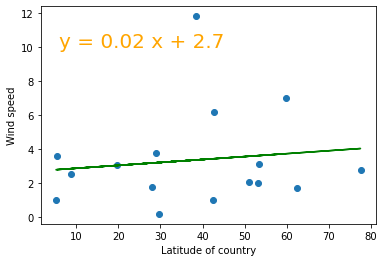

<Figure size 432x288 with 0 Axes>

In [53]:
# linear regression equation and line plot of North Hem wind speed vs latitude
x_values = North_data['lat']
y_values = North_data['speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

plt.annotate(line_eq,(6,10), fontsize=20, color="orange")

plt.xlabel('Latitude of country')
plt.ylabel('Wind speed')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.1 x + 2.5


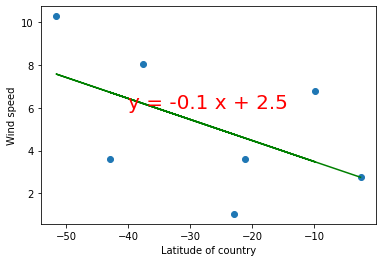

<Figure size 432x288 with 0 Axes>

In [54]:
# linear regression equation and line plot of South Hem wind speed vs latitude
x_values = south_data['Lat']
y_values = south_data['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")

plt.annotate(line_eq,(-40, 6), fontsize=20, color="red")

plt.xlabel('Latitude of country')
plt.ylabel('Wind speed')
plt.show()
plt.savefig("foo.png", bbox_inches='tight')

In [ ]:
# Comments on WeatherPy_Adebayo

# Written description of three observable trends based on the data

# 1.For countries in the Norther Hemisphere, maximum temperature decreases with their latitude according to the equation max_temp = -0.8*lat + 36.39 ; whereas humidity, cloudiness and wind speed  increase with latitude according to hum = 0.22*lat + 65.29, clouds = 0.82*lat + 23.34, and speed = 0.02*lat + 2.7 respectively.

# 2. On the other hand, for countries in the Southern hemisphere, maximum temperature, humidity and cloudiness increase with latitude according to equation max_tem = 0.35*lat + 29.79; Hum = 0.68*lat + 92.33 and clouds = 1.08*lat + 78.16 respectively. Wind speed decreases with latitude according to equation speed = -0.1*lat + 2.5

# 3. As expected, humidity, cloudiness and wind speed trend are generally in opposite direction to maximum temperature of the countries in a given latitude in the Northern Hemisphere. The trend is not as clear cut for countries in the Southern Hemisphere: Humidity and clouds pattern appear to generally increase with maximum temperature whereas wind speed decreases with maximum temperature for countries in the Southern Hemisphere.
